<a href="https://colab.research.google.com/github/Jash-Bhatia/Machine_Learning/blob/master/ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from keras import models
from keras import layers
from keras.utils import to_categorical

In [3]:
from sklearn.datasets import fetch_covtype, fetch_kddcup99, fetch_lfw_pairs, fetch_lfw_people, fetch_olivetti_faces
from sklearn.datasets import fetch_rcv1, load_breast_cancer, load_digits, load_wine

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Breast Cancer Dataset


In [4]:
dataraw1 = load_breast_cancer()
dataraw1

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [5]:
bcancer_data = pd.read_csv(dataraw1['filename'],names = dataraw1['feature_names'])
bcancer_target = pd.DataFrame(dataraw1['target'])

In [6]:
bcancer_data = bcancer_data.iloc[1:,:]

In [7]:
bcancer_data.describe()

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
scalar = StandardScaler()

bcancer_data = pd.DataFrame(scalar.fit_transform(bcancer_data))

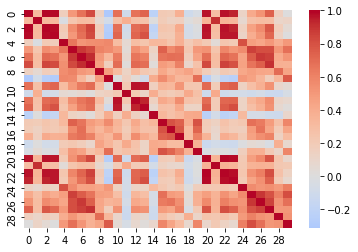

In [9]:
sns.heatmap(bcancer_data.corr(), center=0, cmap='coolwarm')

In [10]:
x_train, x_split, y_train, y_split = train_test_split(bcancer_data,bcancer_target, test_size = 0.2, random_state = 0, shuffle = True)
x_val, x_test, y_val, y_test  = train_test_split(x_split, y_split, test_size = 0.5)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(455, 30)
(57, 30)
(57, 30)
(455, 1)
(57, 1)
(57, 1)


In [11]:
##build model

nn_bcancer = models.Sequential()

In [12]:
## add layers

nn_bcancer.add(layers.Dense(units = 128, activation='tanh', input_shape = (30,)))
nn_bcancer.add(layers.Dense(units = 256, activation='relu'))
nn_bcancer.add(layers.Dense(1,activation='sigmoid'))

In [13]:
## compile model

nn_bcancer.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## here optimizer adam works better than sgd

In [14]:
bcancer_history = nn_bcancer.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_val,y_val))

print('\n\n')
bcancer_val_acc = nn_bcancer.evaluate(x_val, y_val)[1]
print('The validation accuracy is', bcancer_val_acc)
print('\n\n')
bcancer_test_acc = nn_bcancer.evaluate(x_test, y_test)[1]
print('The test accuracy is', bcancer_test_acc)

Epoch 1/20
46/46 [==============================] - 0s 6ms/step - loss: 0.1761 - accuracy: 0.9429 - val_loss: 0.0890 - val_accuracy: 0.9649
Epoch 2/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0781 - accuracy: 0.9780 - val_loss: 0.0913 - val_accuracy: 0.9649
Epoch 3/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0595 - accuracy: 0.9824 - val_loss: 0.0923 - val_accuracy: 0.9825
Epoch 4/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9824 - val_loss: 0.0848 - val_accuracy: 0.9474
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9912 - val_loss: 0.0830 - val_accuracy: 0.9649
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9912 - val_loss: 0.0921 - val_accuracy: 0.9474
Epoch 7/20
46/46 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.1068 - val_accuracy: 0.9649
Epoch 8/20
46/46 [==

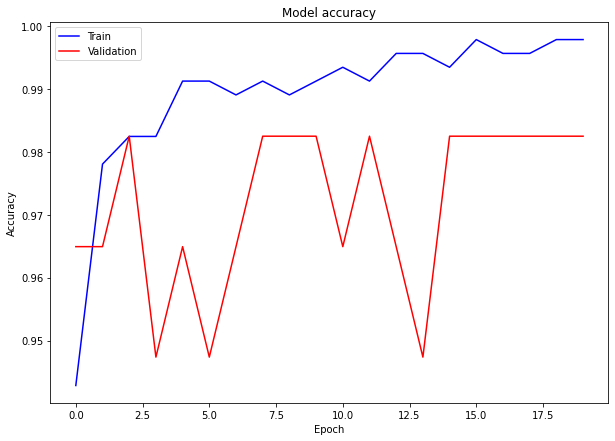

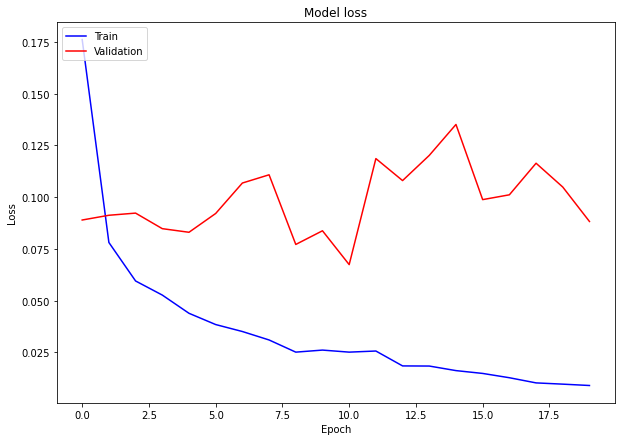

In [15]:
plt.figure(figsize = (10,7))
plt.plot(bcancer_history.history['accuracy'], color = 'blue')
plt.plot(bcancer_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(bcancer_history.history['loss'], color = 'blue')
plt.plot(bcancer_history.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Wine Dataset

In [16]:
dataraw2 = load_wine()
dataraw2

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [17]:
wine = pd.DataFrame(dataraw2['data'], columns=dataraw2['feature_names'])
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

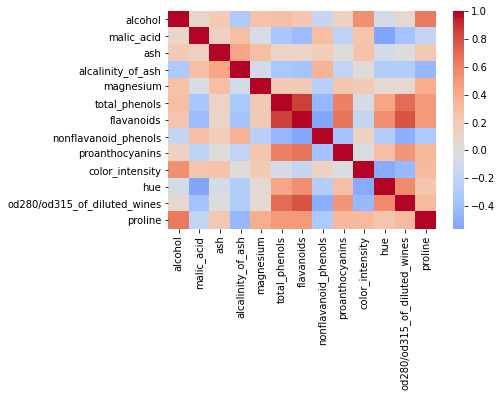

In [18]:
sns.heatmap(wine.corr(), center = 0, cmap='coolwarm')

In [19]:
wine = pd.DataFrame(scalar.fit_transform(wine))
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [20]:
wine_target = pd.DataFrame(dataraw2['target'])
wine_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [21]:
wine_target = to_categorical(wine_target, num_classes=3)

In [22]:
print(wine.shape, wine_target.shape)

(178, 13) (178, 3)


In [23]:
x_train, x_split, y_train, y_split = train_test_split(wine, wine_target, test_size = 0.4, shuffle = True, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_split, y_split, test_size = 0.5)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(106, 13)
(36, 13)
(36, 13)
(106, 3)
(36, 3)
(36, 3)


In [24]:
nn_wine = models.Sequential()

In [25]:
nn_wine.add(layers.Dense(units=64, activation='relu', input_shape = (13,)))
nn_wine.add(layers.Dense(128, activation='tanh'))
nn_wine.add(layers.Dense(3, activation='softmax'))

In [26]:
nn_wine.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [27]:
wine_hist = nn_wine.fit(x_train, y_train, batch_size=10, epochs = 20, validation_data=(x_val, y_val))

Epoch 1/20
11/11 [==============================] - 0s 27ms/step - loss: 1.1331 - accuracy: 0.3302 - val_loss: 0.9543 - val_accuracy: 0.6944
Epoch 2/20
11/11 [==============================] - 0s 3ms/step - loss: 0.8489 - accuracy: 0.7925 - val_loss: 0.7414 - val_accuracy: 0.8611
Epoch 3/20
11/11 [==============================] - 0s 3ms/step - loss: 0.6696 - accuracy: 0.9057 - val_loss: 0.5960 - val_accuracy: 0.8611
Epoch 4/20
11/11 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.9340 - val_loss: 0.4936 - val_accuracy: 0.9167
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.4535 - accuracy: 0.9434 - val_loss: 0.4190 - val_accuracy: 0.9167
Epoch 6/20
11/11 [==============================] - 0s 3ms/step - loss: 0.3865 - accuracy: 0.9528 - val_loss: 0.3622 - val_accuracy: 0.9167
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.9717 - val_loss: 0.3186 - val_accuracy: 0.9167
Epoch 8/20
11/11 [=

In [28]:
nn_wine.evaluate(x_val, y_val)[1] 

2/2 [==============================] - 0s 1ms/step - loss: 0.1268 - accuracy: 1.0000


1.0

In [29]:
nn_wine.evaluate(x_test, y_test)[1]

2/2 [==============================] - 0s 2ms/step - loss: 0.1816 - accuracy: 0.9722


0.9722222089767456

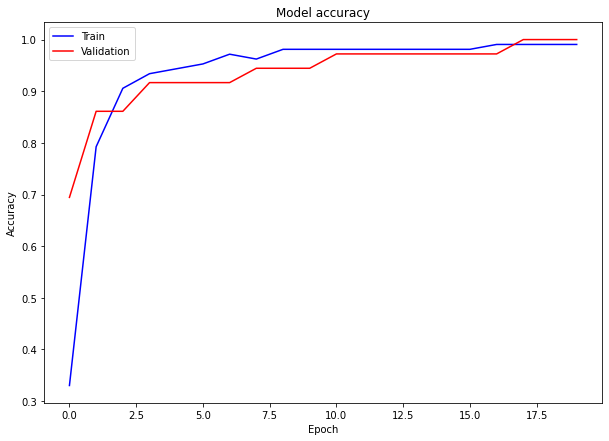

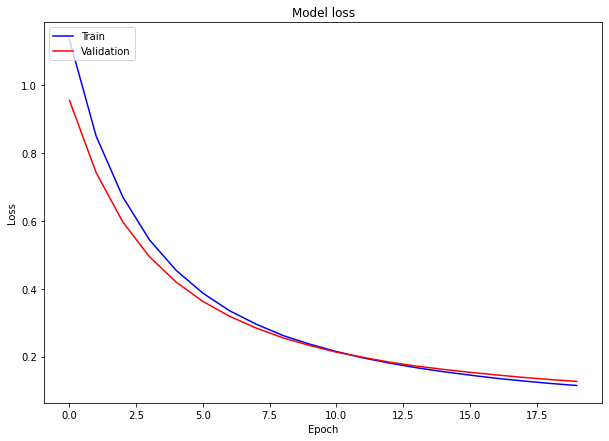

In [30]:
plt.figure(figsize = (10,7))
plt.plot(wine_hist.history['accuracy'], color = 'blue')
plt.plot(wine_hist.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(wine_hist.history['loss'], color = 'blue')
plt.plot(wine_hist.history['val_loss'], color = 'red')
# plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Forest Cover Dataset

In [31]:
dataraw3 = fetch_covtype()
dataraw3

{'DESCR': ".. _covtype_dataset:\n\nForest covertypes\n-----------------\n\nThe samples in this dataset correspond to 30×30m patches of forest in the US,\ncollected for the task of predicting each patch's cover type,\ni.e. the dominant species of tree.\nThere are seven covertypes, making this a multiclass classification problem.\nEach sample has 54 features, described on the\n`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.\nSome of the features are boolean indicators,\nwhile others are discrete or continuous measurements.\n\n**Data Set Characteristics:**\n\n    =================   ============\n    Classes                        7\n    Samples total             581012\n    Dimensionality                54\n    Features                     int\n    =================   ============\n\n:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;\nit returns a dictionary-like object\nwith the feature matrix in the ``data`` member\nand the target values

In [32]:
fcover = pd.DataFrame(dataraw3['data'])
fcover.shape

(581012, 54)

In [33]:
fcover_target = pd.DataFrame(to_categorical(dataraw3['target']))
fcover_target.drop(columns=0, inplace=True)
fcover_target.describe()

,1,2,3,4,5,6,7
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.364605,0.487599,0.061537,0.004728,0.016339,0.029891,0.035300
std,0.481979,0.499236,0.240540,0.068436,0.126657,0.170510,0.184711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
x_train, x_split, y_train, y_split = train_test_split(fcover, fcover_target, test_size = 0.4, shuffle = True, random_state = 0)
x_val, x_test, y_val, y_test = train_test_split(x_split, y_split, test_size = 0.5)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(348607, 54)
(116202, 54)
(116203, 54)
(348607, 7)
(116202, 7)
(116203, 7)


In [35]:
nn_forest = models.Sequential()

In [36]:
nn_forest.add(layers.Dense(128, activation = 'relu', input_shape = (54,)))
nn_forest.add(layers.Dense(256, activation = 'tanh'))
nn_forest.add(layers.Dense(512, activation='relu'))
nn_forest.add(layers.Dense(256, activation='tanh'))
nn_forest.add(layers.Dense(128, activation='relu'))
nn_forest.add(layers.Dense(7,activation='softmax'))

In [37]:
nn_forest.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [38]:
forest_hist= nn_forest.fit(x_train, y_train, batch_size=1000, epochs=50, validation_data=(x_val,y_val))

Epoch 1/50
349/349 [==============================] - 16s 47ms/step - loss: 1.0659 - accuracy: 0.5124 - val_loss: 1.0341 - val_accuracy: 0.5180
Epoch 2/50
349/349 [==============================] - 16s 47ms/step - loss: 0.9382 - accuracy: 0.5886 - val_loss: 0.9276 - val_accuracy: 0.6086
Epoch 3/50
349/349 [==============================] - 16s 46ms/step - loss: 0.8990 - accuracy: 0.6225 - val_loss: 0.8974 - val_accuracy: 0.5968
Epoch 4/50
349/349 [==============================] - 16s 46ms/step - loss: 0.8559 - accuracy: 0.6453 - val_loss: 0.8446 - val_accuracy: 0.6446
Epoch 5/50
349/349 [==============================] - 16s 46ms/step - loss: 0.8466 - accuracy: 0.6466 - val_loss: 0.8367 - val_accuracy: 0.6524
Epoch 6/50
349/349 [==============================] - 16s 46ms/step - loss: 0.8248 - accuracy: 0.6636 - val_loss: 0.8280 - val_accuracy: 0.6708
Epoch 7/50
349/349 [==============================] - 16s 46ms/step - loss: 0.8149 - accuracy: 0.6625 - val_loss: 0.8528 - val_accuracy:

In [39]:
nn_forest.evaluate(x_val, y_val)[1]

3632/3632 [==============================] - 6s 2ms/step - loss: 0.5402 - accuracy: 0.7641


0.7641090750694275

In [40]:
nn_forest.evaluate(x_test, y_test)[1]

3632/3632 [==============================] - 6s 2ms/step - loss: 0.5395 - accuracy: 0.7655


0.7655395865440369

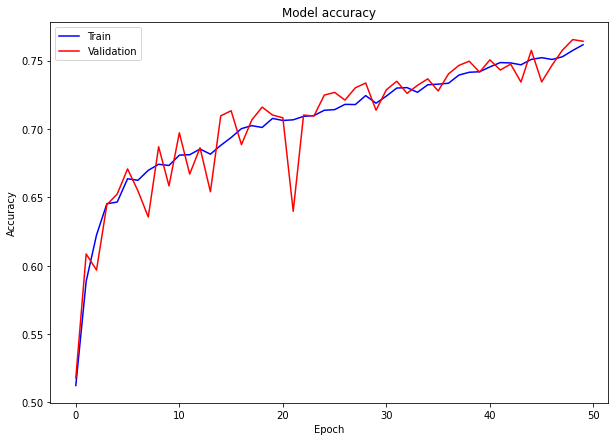

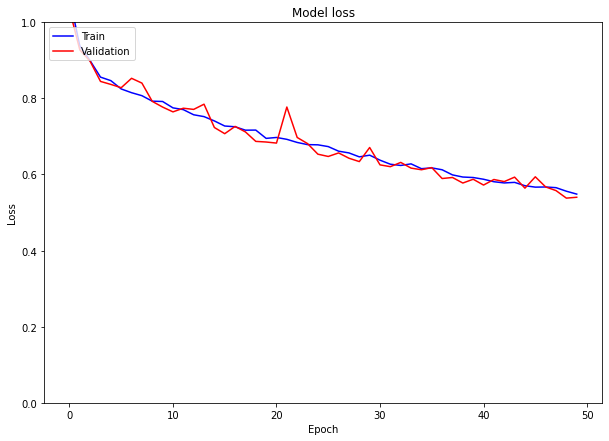

In [41]:
plt.figure(figsize = (10,7))
plt.plot(forest_hist.history['accuracy'], color = 'blue')
plt.plot(forest_hist.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(forest_hist.history['loss'], color = 'blue')
plt.plot(forest_hist.history['val_loss'], color = 'red')
plt.ylim((0,1))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# KddCups99 Dataset

In [42]:
kddcup99 = fetch_kddcup99()
x_fetch_kddcup99 = kddcup99.data
y_fetch_kddcup99 = kddcup99.target

In [43]:
x_kdd = pd.DataFrame(x_fetch_kddcup99)
y_kdd = pd.DataFrame(y_fetch_kddcup99)
print(x_kdd.shape)
print(y_kdd.shape)

(494021, 41)
(494021, 1)


In [44]:
le = LabelEncoder()
for i in [1,2,3]:
  x_kdd[i] = [j.decode('utf-8') for j in x_kdd[i]]
  x_kdd[i] = le.fit_transform(x_kdd[i])

for i in range(x_kdd.shape[1]):
  x_kdd[i] = x_kdd[i].astype('float')

In [45]:
y_kdd99 = [i.decode('utf-8') for i in y_fetch_kddcup99]
y_kdd99 = pd.DataFrame(le.fit_transform(y_kdd99))

In [46]:
y_kdd99 = to_categorical(y_kdd99)
x_train, x_test, y_train, y_test = train_test_split(x_kdd, y_kdd99, test_size = 0.2)
x_dev, x_test, y_dev, y_test = train_test_split(x_test, y_test, test_size = 0.5)
print(x_train.shape)
print(x_dev.shape)
print(x_test.shape)
print(y_train.shape)
print(y_dev.shape)
print(y_test.shape)

(395216, 41)
(49402, 41)
(49403, 41)
(395216, 23)
(49402, 23)
(49403, 23)


In [47]:
nn_kdd99 = models.Sequential()
nn_kdd99.add(layers.Dense(256, activation = 'relu', input_shape = (41, )))
nn_kdd99.add(layers.Dense(128, activation = 'relu'))
nn_kdd99.add(layers.Dense(64, activation = 'relu'))
nn_kdd99.add(layers.Dense(32, activation = 'relu'))
nn_kdd99.add(layers.Dense(23, activation = 'softmax'))
nn_kdd99.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [48]:
kdd99_history = nn_kdd99.fit(x_train, y_train, epochs = 10, batch_size = 1000, validation_data = (x_dev, y_dev))

Epoch 1/10
396/396 [==============================] - 5s 11ms/step - loss: 109.2197 - accuracy: 0.9512 - val_loss: 4.6717 - val_accuracy: 0.9640
Epoch 2/10
396/396 [==============================] - 4s 11ms/step - loss: 130.4110 - accuracy: 0.9770 - val_loss: 4.4498 - val_accuracy: 0.9691
Epoch 3/10
396/396 [==============================] - 4s 11ms/step - loss: 78.6972 - accuracy: 0.9841 - val_loss: 10.4723 - val_accuracy: 0.9868
Epoch 4/10
396/396 [==============================] - 4s 11ms/step - loss: 79.3164 - accuracy: 0.9860 - val_loss: 4.3919 - val_accuracy: 0.8644
Epoch 5/10
396/396 [==============================] - 5s 11ms/step - loss: 26.5883 - accuracy: 0.9879 - val_loss: 0.6596 - val_accuracy: 0.9820
Epoch 6/10
396/396 [==============================] - 4s 11ms/step - loss: 60.5170 - accuracy: 0.9885 - val_loss: 0.5401 - val_accuracy: 0.9937
Epoch 7/10
396/396 [==============================] - 4s 11ms/step - loss: 88.8848 - accuracy: 0.9918 - val_loss: 0.5245 - val_accura

In [51]:
kdd99_dev_acc = nn_kdd99.evaluate(x_dev, y_dev)[1]
print('The dev accuracy is', kdd99_dev_acc)

kdd99_test_acc = nn_kdd99.evaluate(x_test, y_test)[1]
print('The test accuracy is', kdd99_test_acc)

1544/1544 [==============================] - 1s 937us/step - loss: 0.0410 - accuracy: 0.9926
The dev accuracy is 0.9925509095191956
1544/1544 [==============================] - 1s 931us/step - loss: 0.0387 - accuracy: 0.9923
The test accuracy is 0.992328405380249


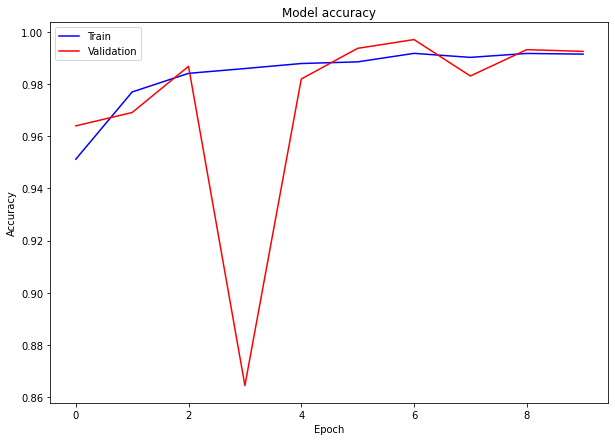

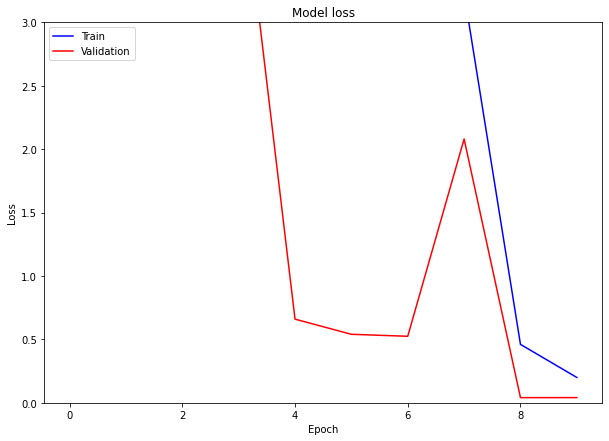

In [52]:

plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['accuracy'], color = 'blue')
plt.plot(kdd99_history.history['val_accuracy'], color = 'red')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize = (10,7))
plt.plot(kdd99_history.history['loss'], color = 'blue')
plt.plot(kdd99_history.history['val_loss'], color = 'red')
plt.ylim((0,3))
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()